# Learning Basic Feature Engineering
[source](https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/)

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate example

1. Read in data
2. Peek at data with head &/or tail
3. Check size

In [94]:
series = read_csv('daily-total-female-births.csv', index_col=0, parse_dates=['Date'])

print("\nHead:", series.head())
print("\nTail:", series.tail())
print("\nDataset size:", series.size)


Head:             Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

Tail:             Births
Date              
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

Dataset size: 365


2. slice, dice, and query your series using the time index

   note - must use .loc when indexing timeseries

In [96]:
series.loc['1959-06-02']

Births    46
Name: 1959-06-02 00:00:00, dtype: int64

In [91]:
series.loc['1959-06']

,Births
Date,
1959-06-01,45
1959-06-02,46
1959-06-03,34
1959-06-04,35
1959-06-05,48
1959-06-06,51
1959-06-07,36
1959-06-08,33
1959-06-09,46


In [92]:
series.loc['1959-06-02':'1959-12-02']

,Births
Date,
1959-06-02,46
1959-06-03,34
1959-06-04,35
1959-06-05,48
1959-06-06,51
...,...
1959-11-28,46
1959-11-29,44
1959-11-30,52


### Resampling: Like binning but specifically for time-series data

For if one needs to change the data instead of daily to monthly or weekly etc. or vice versa. 

*Resample time-series data.*
Convenience method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

Resampling is the process of changing the frequency of your time series data. You can up-sample (increase the frequency) or down-sample (decrease the frequency) your time series data.

	•	Down-sampling: Aggregating data to a lower frequency (e.g., converting daily data into monthly data).
	•	Up-sampling: Increasing the frequency of data (e.g., converting daily data to hourly data, which may require filling in missing values).


Parameters:

*closed*: {‘right’, ‘left’}, default None

Which side of bin interval is closed. The default is ‘left’ for all frequency offsets except for 
- ‘ME’ (Month End),
- ‘YE’(Yr End),
- ‘QE’ (Quarterly End),
- ‘BME’ (Business Month End - Represents the last business day of each month),
- ‘BA’ (Business Year End - Represents the last business day of each year),
- ‘BQE’ (Business Quarter End - Represents the last business day of each quarter), and
- ‘W’ (Weekly)

which all have a default of ‘right’.


*label*:{‘right’, ‘left’}, default None

Which bin edge label to label bucket with. The default is ‘left’ for all frequency offsets except for ‘ME’, ‘YE’, ‘QE’, ‘BME’, ‘BA’, ‘BQE’, and ‘W’ which all have a default of ‘right’.

In [106]:
# or .mean()
series.resample('ME').sum()

,Births
Date,
1959-01-31,1213
1959-02-28,1148
1959-03-31,1218
1959-04-30,1195
1959-05-31,1208
1959-06-30,1212
1959-07-31,1300
1959-08-31,1351
1959-09-30,1446


Time-based Calculations: It simplifies operations like calculating moving averages or other rolling window functions:

In [87]:
series.loc['1959-06-02'].rolling(window=2).mean()

Births   NaN
Name: 1959-06-02 00:00:00, dtype: float64

In [104]:
# little example
# create a series with 9 one minute timestamps
index = pd.date_range('1/1/2000', periods=9, freq='min')
ex = pd.Series(range(9), index=index)
ex

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: min, dtype: int64

In [105]:
# Downsample the series into 3 minute bins and sum the values of the timestamps falling into a bin.
ex.resample('3min').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3min, dtype: int64

In [107]:
series.resample('2ME').sum()

,Births
Date,
1959-01-31,1213
1959-03-31,2366
1959-05-31,2403
1959-07-31,2512
1959-09-30,2797
1959-11-30,2718
1960-01-31,1314


# Calculate descriptive statistics

In [108]:
series.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Plot
Plotting time series data, especially univariate time series, is an important part of exploring your data.

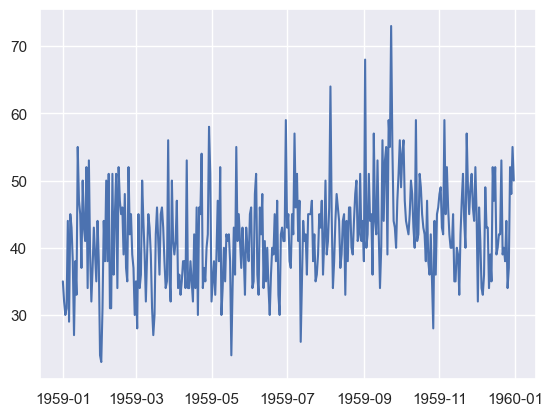

In [109]:
plt.plot(series);
plt.show()

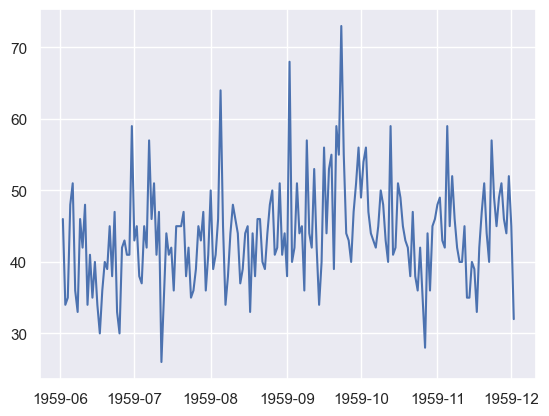

In [111]:
plt.plot(series['1959-06-02':'1959-12-02'])

# Multivariate Multi-step example
[source](https://machinelearningmastery.com/how-to-load-visualize-and-explore-a-complex-multivariate-multistep-time-series-forecasting-dataset/)

The EMC Data Science Global Hackathon dataset, or the ‘Air Quality Prediction‘ dataset for short, describes weather conditions at multiple sites and requires a prediction of air quality measurements over the subsequent three days.

Specifically, weather observations such as temperature, pressure, wind speed, and wind direction are provided hourly for eight days for multiple sites. The objective is to predict air quality measurements for the next three days at multiple sites. The forecast lead times are not contiguous; instead, specific lead times must be forecast over the 72 hour forecast period; they are:

`+1, +2, +3, +4, +5, +10, +17, +24, +48, +72`

Further, the dataset is divided into disjoint but contiguous chunks of data, with eight days of data followed by three days that require a forecast.

Not all observations are available at all sites or chunks and not all output variables are available at all sites and chunks. There are large portions of missing data that must be addressed.

In [115]:
dataset = read_csv('TrainingData.csv')
dataset

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37816,55364,210,188,8,Wednesday,4,0.01,35.0,NaN,0.5,...,1.453953,NaN,0.933143,NaN,NaN,0.291653,0.291653,NaN,0.642453,NaN
37817,55365,210,189,8,Wednesday,5,0.01,41.0,NaN,0.5,...,1.076661,NaN,0.599878,NaN,NaN,0.291653,0.291653,NaN,1.002226,NaN
37818,55366,210,190,8,Wednesday,6,0.04,90.0,NaN,1.6,...,1.113470,NaN,0.599878,NaN,NaN,0.291653,0.291653,NaN,0.822339,NaN
37819,55367,210,191,8,Wednesday,7,0.14,35.0,NaN,0.8,...,1.058257,NaN,0.666531,NaN,NaN,0.291653,0.291653,NaN,0.719547,NaN


We can also get a quick idea of how much missing data there is in the dataset. We can do that by first trimming the first few columns to remove the string weekday data and convert the remaining columns to floating point values.

We can then calculate the total number of missing observations and the percentage of values that are missing.

In [116]:
# trim and transform to floats
values = dataset.values
data = values[:, 6:].astype('float32')
data

array([[9.9999998e-03, 1.1700000e+02, 1.8700000e+02, ...,           nan,
        5.6792803e+00,           nan],
       [9.9999998e-03, 2.3100000e+02, 2.0200000e+02, ...,           nan,
        7.4267511e+00,           nan],
       [9.9999998e-03, 2.4700000e+02, 2.2700000e+02, ...,           nan,
        7.6837320e+00,           nan],
       ...,
       [3.9999999e-02, 9.0000000e+01,           nan, ...,           nan,
        8.2233924e-01,           nan],
       [1.4000000e-01, 3.5000000e+01,           nan, ...,           nan,
        7.1954679e-01,           nan],
       [4.7999999e-01, 3.8000000e+01,           nan, ...,           nan,
        4.3686771e-01,           nan]], dtype=float32)

In [121]:
# summarize amount of missing data
total_missing = np.count_nonzero(np.isnan(data))
percent_missing = total_missing / data.size * 100
print('Total Missing: %d/%d (%.1f%%)' % (total_missing, data.size, percent_missing))

Total Missing: 1922092/3366069 (57.1%)


We can also see that a little over 40% of the data is missing. This is a lot. The data is very patchy and we are going to have to understand this well before modeling the problem.

## Chunk Data Structure

A good starting point is to look at the data in terms of the chunks.

We can group data by the ‘chunkID’ variable (column index 1).

If each chunk is eight days and the observations are hourly, then we would expect (8 * 24) or 192 rows of data per chunk.

If there are 37,821 rows of data, then there must be chunks with more or less than 192 hours as 37,821/192 is about 196.9 chunks.

Let’s first split the data into chunks. We can first get a list of the unique chunk identifiers.

In [138]:
# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = np.unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

In [134]:
pd.DataFrame(values)

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.67928,NaN
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.14412,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.11097,3.888712,NaN,7.683732,NaN
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37816,55364,210,188,8,Wednesday,4,0.01,35.0,NaN,0.5,...,1.453953,NaN,0.933143,NaN,NaN,0.291653,0.291653,NaN,0.642453,NaN
37817,55365,210,189,8,Wednesday,5,0.01,41.0,NaN,0.5,...,1.076661,NaN,0.599878,NaN,NaN,0.291653,0.291653,NaN,1.002226,NaN
37818,55366,210,190,8,Wednesday,6,0.04,90.0,NaN,1.6,...,1.11347,NaN,0.599878,NaN,NaN,0.291653,0.291653,NaN,0.822339,NaN
37819,55367,210,191,8,Wednesday,7,0.14,35.0,NaN,0.8,...,1.058257,NaN,0.666531,NaN,NaN,0.291653,0.291653,NaN,0.719547,NaN


In [151]:
# plot distribution of chunk durations
def plot_chunk_durations(chunks):
	# chunk durations in hours
    # k: chunck number
    # data chunk
	chunk_durations = [len(v) for k,v in chunks.items()]
	# boxplot
    # (nrows, ncols, index)
	plt.subplot(2, 1, 1)
	plt.boxplot(chunk_durations)
	# histogram
	plt.subplot(2, 1, 2)
	plt.hist(chunk_durations)
	# histogram
	plt.show()

In [ ]:
chchchchchcch

Total Chunks: 208


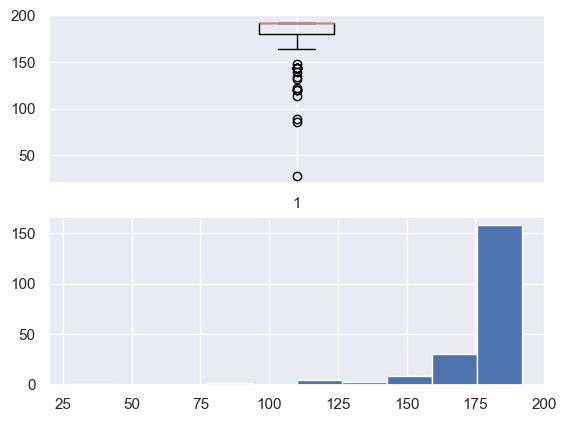

In [152]:
chunks = to_chunks(values)
print('Total Chunks: %d' % len(chunks))
# plot chunk durations
plot_chunk_durations(chunks)

We can see that there are 208, which suggests that indeed the number of hourly observations must vary across the chunks.

A box and whisker plot and a histogram plot of chunk durations is created. We can see that indeed the median is 192, meaning that most chunks have eight days of observations or close to it.

We can also see a long tail of durations down to about 25 rows. Although there are not many of these cases, we would expect that will be challenging to forecast given the lack of data.